In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [187]:
import os
import numpy as np

directory1 = 'homer_bart/Homer'
directory2 = 'homer_bart/Bart'

images1 = [f for f in os.listdir(directory1) if f.endswith('.bmp')]
images2 = [f for f in os.listdir(directory2) if f.endswith('.bmp')]
# print(imgs[0])
img_homer =[]
img_bart =[]

for file in images1:
    file_path = os.path.join(directory1, file)
    image = Image.open(file_path)
    image = image.resize((64,64))
    img_homer.append(image)
for file in images2:
    file_path = os.path.join(directory2, file)
    image = Image.open(file_path)
    image = image.resize((64,64))
    img_bart.append(image)





In [188]:
for i in range(len(img_homer)):
    img_homer[i] = np.array(img_homer[i])
for i in range(len(img_bart)):
    img_bart[i] = np.array(img_bart[i])

In [189]:
img_homer[0].shape

(64, 64, 3)

In [190]:
# def rgb_to_grayscale(image_array):
#     """
#     Convert an RGB image to grayscale using the luminosity method.
#     The weights are based on the human perception of colors.
#     """
#     r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]
#     grayscale_image = 0.2989 * r + 0.5870 * g + 0.1140 * b
#     return grayscale_image


# for e in range(len(img_homer)):
#     img_homer[e] = rgb_to_grayscale(img_homer[e])
#     # print(e.shape)
# for s in range(len(img_bart)):
#     img_bart[s] = rgb_to_grayscale(img_bart[s])

 

In [191]:
img_homer[0].shape

(64, 64, 3)

In [192]:
for i in range(len(img_homer)):
    img_homer[i] = img_homer[i].flatten()
    # print(e.shape)
for i in range(len(img_bart)):
    img_bart[i] = img_bart[i].flatten()


In [193]:
img_homer[0].shape

(12288,)

In [194]:
len(img_homer), len(img_bart)

(109, 160)

In [195]:
data = np.concatenate((list(img_homer),list(img_bart)),axis=0)
data.shape


(269, 12288)

In [196]:
h = 0
b=1


label=[]
for i in range(data.shape[0]):
    if i < 109:
        label.append(h)
    else:
        label.append(b)




In [197]:
label = np.expand_dims(np.array(label),axis=1)
label.shape

(269, 1)

In [198]:
data = np.concatenate((list(data), label),axis=1)
data.shape

(269, 12289)

In [199]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import keras_tuner
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Input,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import regularizers



In [423]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import random
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

np.random.seed(20)
tf.random.set_seed(20)
random.seed(20)

# data_arr = np.array(df_merged_new)
# data_arr = np.array(data_new)
np.random.shuffle(data)
X = data[:,0:-1]
y = data[:,-1]

# max(X[:,2])
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1])

In [424]:
y.shape


(269,)

In [425]:
X[0]


array([255, 255, 255, ..., 255, 255, 255])

In [426]:
X = X/255 # Normalizing 


In [427]:
X = X.reshape(269,64,64,3)
X.shape

(269, 64, 64, 3)

In [493]:
import random 
import os
# tf.config.threading.set_intra_op_parallelism_threads(1)
# tf.config.threading.set_inter_op_parallelism_threads(1)# 


# Ensure deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=30)

# scaler = StandardScaler()
# X_train =  scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [494]:
X_train.shape

(242, 64, 64, 3)

In [495]:
X[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [496]:
X_test.shape


(27, 64, 64, 3)

In [497]:
# X = np.expand_dims(X,axis=-1)
# X.shape

In [498]:
from tensorflow.keras.layers import Dropout

nn = models.Sequential([
    layers.Flatten(input_shape=(64,64,X.shape[-1])),
    layers.Dense(256,activation='relu'),
    # Dropout(0.3),
    layers.Dense(128,activation='relu'),
    # Dropout(0.3),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    # Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
    # layers.Dense(1,activation='sigmoid')
])

In [499]:
nn.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,189,249 (12.17 MB)

 Trainable params: 3,189,249 (12.17 MB)

 Non-trainable params: 0 (0.00 B)

In [500]:
nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [501]:
X_train = X_train.reshape(-1,64,64,3)
X_test = X_test.reshape(-1,64,64,3)
# X = np.expand_dims(X,axis=3)

In [502]:
X_test.shape

(27, 64, 64, 3)

1


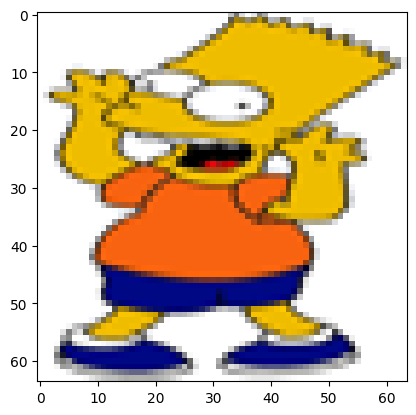

In [503]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0,:,:,:])
print(y_train[0])

In [504]:
X_train.shape

(242, 64, 64, 3)

In [505]:
# y_train = np.expand_dims(y_train,axis=-1)
# y_test = np.expand_dims(y_test,axis=-1)
y_train.shape

(242,)

In [506]:
# from keras.callbacks import EarlyStopping

# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=200)
history = nn.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=None,shuffle=True)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4554 - loss: 1.6815
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5267 - loss: 0.7787
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6244 - loss: 0.6432
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7367 - loss: 0.5674
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7326 - loss: 0.5412
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7995 - loss: 0.4810
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7647 - loss: 0.4699
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7977 - loss: 0.4318
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7891 - loss: 0.4162
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8131 - loss: 0.3875
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8398 - loss: 0.3614
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8647 - lo

In [507]:
test_loss, test_accuracy = nn.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - accuracy: 0.8519 - loss: 1.1566
Test Accuracy: 0.8519


1


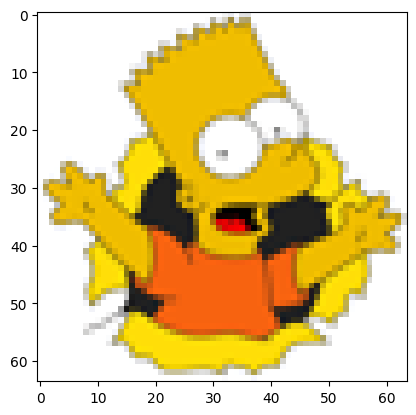

In [508]:
plt.imshow(X_test[26])
print(y_test[26])

In [476]:
# os.makedirs('train')
# os.makedirs('test')
np.savetxt('train/x_train_flat.csv',X_train.flatten())
np.savetxt('train/y_train.csv',y_train)
np.savetxt('test/x_test_flat.csv',X_test.flatten())
np.savetxt('test/y_test.csv',y_test)